In [2]:
# Cell 1: Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA


In [3]:
# Cell 2: Load the dataset
df = pd.read_csv('threats.csv')

# Display the first few rows of the dataset
df.head()

,Date,DDoS-ALL,Phishing-ALL,Ransomware-ALL,Password Attack-ALL,SQL Injection-ALL,Account Hijacking-ALL,Defacement-ALL,Trojan-ALL,Vulnerability-ALL,...,Brute Force Attack-ALL,Malvertising-ALL,Backdoor-ALL,Botnet-ALL,Cryptojacking-ALL,Worms-ALL,Spyware-ALL,Unknown-ALL,Others-ALL,WAR/CONFLICT ALL
0,Jul-11,2,1,0,8,13,0,7,0,0,...,0,0,0,0,0,0,0,0,12,2045
1,Aug-11,2,0,0,7,56,0,44,0,3,...,0,0,0,0,0,0,0,0,2,4441
2,Sep-11,2,0,0,42,20,0,9,3,40,...,0,0,0,0,0,0,0,0,44,4401
3,Oct-11,38,38,0,38,84,1,125,2,38,...,0,0,1,0,0,0,0,0,8,5136
4,Nov-11,7,38,0,32,49,0,11,0,40,...,0,0,0,0,0,0,0,0,10,18985


In [4]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Date                               129 non-null    object
 1   DDoS-ALL                           129 non-null    int64 
 2   Phishing-ALL                       129 non-null    int64 
 3   Ransomware-ALL                     129 non-null    int64 
 4   Password Attack-ALL                129 non-null    int64 
 5   SQL Injection-ALL                  129 non-null    int64 
 6   Account Hijacking-ALL              129 non-null    int64 
 7   Defacement-ALL                     129 non-null    int64 
 8   Trojan-ALL                         129 non-null    int64 
 9   Vulnerability-ALL                  129 non-null    int64 
 10  Zero-day-ALL                       129 non-null    int64 
 11  Advanced persistent threat-ALL     129 non-null    int64 
 12  XSS-ALL 

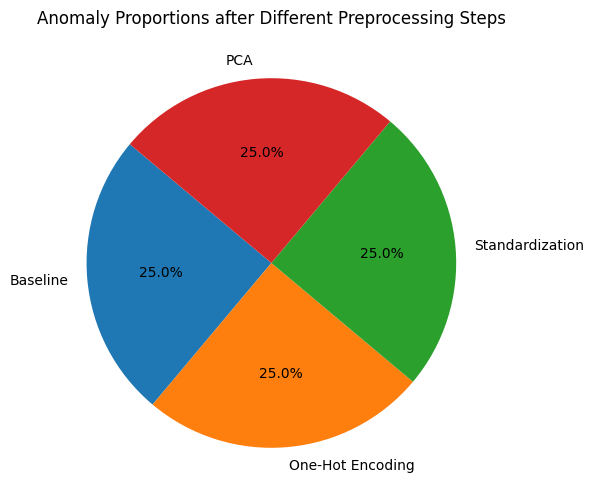

                  Anomaly Proportion
Baseline                        0.25
One-Hot Encoding                0.25
Standardization                 0.25
PCA                             0.25


In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'feature1': [1, 2, 3, 4],
    'feature2': ['A', 'B', 'A', 'B'],
    'feature3': [10.1, 20.2, 30.3, 40.4],
    'date': ['Jul-11', 'Aug-11', 'Sep-11', 'Oct-11']
}
df = pd.DataFrame(data)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%b-%y')

# Extract useful features from the date column
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Drop the original date column
df = df.drop('date', axis=1)

# Encode categorical variables
categorical_features = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and concatenate encoded columns
df = df.drop(categorical_features, axis=1)
df_encoded = pd.concat([df, df_encoded], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Function to train and evaluate the model
def evaluate_model(X):
    iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
    iso_forest.fit(X)
    predictions = iso_forest.predict(X)
    anomalies = [1 if x == -1 else 0 for x in predictions]
    anomaly_proportion = np.mean(anomalies)
    return anomaly_proportion

# Evaluate models
results = {}
results['Baseline'] = evaluate_model(df)
results['One-Hot Encoding'] = evaluate_model(df_encoded)
results['Standardization'] = evaluate_model(X_scaled)
results['PCA'] = evaluate_model(X_pca)

# Create a DataFrame for the results
results_df = pd.DataFrame(results, index=['Anomaly Proportion']).T

# Plot pie chart for anomaly proportions
plt.figure(figsize=(10, 6))
plt.pie(results_df['Anomaly Proportion'], labels=results_df.index, autopct='%1.1f%%', startangle=140)
plt.title('Anomaly Proportions after Different Preprocessing Steps')
plt.show()

# Display the results table
print(results_df)
